In [4]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
# from mpl_toolkits.basemap import Basemap

In [3]:
!ls

download.nc  get_era5.ipynb  get_profiles.ipynb


In [20]:
location_latlon = {'summit': {'lat':72.58, 'lon':-38.46},
                  'SGP': {'lat':36.605, 'lon':-97.485},
                  'north_slope':{'lat':71.323, 'lon':-156.609}, 
                  'brazil': {'lat': 0.0 , 'lon': -52.242068},
                  'central_pacific': {'lat': 30.0 , 'lon': -159.761687}}
for location in location_latlon.copy(): 
    location_latlon[location]['lon'] = location_latlon[location]['lon'] + 360.0

In [22]:
# location_latlon
# location_latlon['summit']['lon']




In [24]:
location_latlon

{'summit': {'lat': 72.58, 'lon': 321.54},
 'SGP': {'lat': 36.605, 'lon': 262.515},
 'north_slope': {'lat': 71.323, 'lon': 203.391},
 'brazil': {'lat': 0.0, 'lon': 307.757932},
 'central_pacific': {'lat': 30.0, 'lon': 200.238313}}

In [ ]:
ds = xr.open_dataset('download.nc')
ds = ds.rename({'latitude':'lat', 'longitude':'lon'})
ds.load()

# take care of units 
ds['t'] = ds['t'] - 273.15

In [2]:
!ls /export/data1/cchristo/era5

april_2015.nc  feb_2015.nc  Jun_2015.nc    Nov_2015.nc
Aug_2015.nc    jan_2015.nc  march_2015.nc  Oct_2015.nc
Dec_2015.nc    Jul_2015.nc  may_2015.nc    Sep_2015.nc


In [5]:
path_name = "/export/data1/cchristo/era5"
filenames = os.listdir(path_name)
filepaths = [path_name + "/" + filename for filename in filenames]

In [ ]:
# filepaths

In [26]:
ds = xr.open_mfdataset(filepaths, combine='by_coords')
ds = ds.rename({'latitude':'lat', 'longitude':'lon'})
# ds.load()
# take care of units 
# ds['t'] = ds['t'] - 273.15

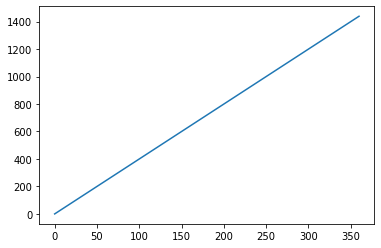

In [11]:
plt.plot(ds['lon'].values, range(len(ds['lon'].values)))

In [ ]:
# plt.plot(ds['lon'].values)




In [86]:
one = ds.isel(time = 0, level = 15)

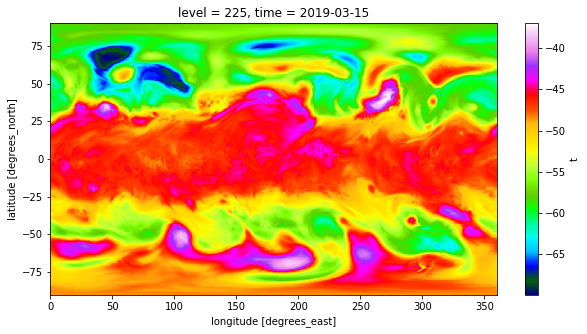

In [87]:
plt.figure(figsize = (10,5))
one['t'].plot.imshow(cmap = plt.get_cmap('gist_ncar'))

In [69]:
ds_time = ds.isel(time = 0)
profile = ds_time.sel(lat = 60, lon = 260, method = 'nearest')

In [56]:
profile

<xarray.Dataset>
Dimensions:  (level: 37)
Coordinates:
    lon      float32 260.0
    lat      float32 60.0
  * level    (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    time     datetime64[ns] 2019-03-15
Data variables:
    t        (level) float32 265.36713 258.9749 243.31007 ... 255.56873 256.6669
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-26 22:52:20 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [82]:
def plot_profile(profile_ds, level_name = 'level', temp_name = 't'):
    '''Given xr.dataset of single profile, plot vertical profile w/ log(p)'''
    pres = profile_ds[level_name].values
    temp = profile_ds[temp_name].values
    
    plt.figure(figsize = (6,6))
    plt.plot(temp, pres)
    plt.gca().invert_yaxis()
    plt.gca().set_yscale('log')
    plt.grid()
    plt.xlabel("Temperature")
    plt.ylabel("Pressure")
    

In [65]:
# ds['t'].values

In [35]:
plot_profile(profile)

NameError: name 'plot_profile' is not defined

In [ ]:
def get_profile(ds, time_i = 0):
    ds_time = ds.isel(time = 0)
    profile = ds
    
    

# Computing Covariance Matrix

In [95]:
# ds['t']

In [19]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 721, level: 37, longitude: 1440, time: 8760)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level      (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
  * time       (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:00:00
Data variables:
    t          (time, level, latitude, longitude) float32 dask.array<concaten...
Attributes:
    Conventions:  CF-1.6
    history:      2020-03-02 20:50:56 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [ ]:
for location in location_latlon:
    profile_timeseries = ds.sel(lat = location_latlon[location]['lat'], 
                                lon = location_latlon[location]['lon'], 
                                method = 'nearest', drop = True)
    ds_field = profile_timeseries['t']
    ds_field.load()
    fname_i = '/export/data1/cchristo/profile_timeseries/' + str(location) + '_ts_2015.nc'
    ds_field.to_dataset().to_netcdf(fname_i)

In [14]:
ts = profile_timeseries['t'].values


In [ ]:
ds_field = profile_timeseries['t']
ds_field.load()

In [71]:
# profile_timeseries.load()

In [31]:
plt.imshow(profile_timeseries['t'].values)
plt.colorbar()

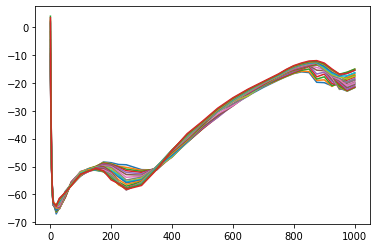

In [117]:
plt.plot(profile_timeseries['level'].values, profile_timeseries['t'].values.T)

In [36]:
print(type(profile_timeseries['t']))
print(profile_timeseries['t'].shape)


<class 'xarray.core.dataarray.DataArray'>
(8760, 37)


In [46]:
# profile_timeseries.isel(time = range(10))['t'].values

In [48]:
profile_timeseries['t'].asarray()

<xarray.DataArray 't' (time: 8760, level: 37)>
dask.array<getitem, shape=(8760, 37), dtype=float32, chunksize=(744, 37), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 60.0
  * level    (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
    lon      float32 260.0
  * time     (time) datetime64[ns] 2015-01-01 ... 2015-12-31T23:00:00

In [39]:
# cov_mat = np.cov(profile_timeseries['t'].values.T)
cov_mat = np.cov(ts.T, bias = True)

In [37]:
cov_mat.shape

(37, 37)

Text(0, 0.5, 'Pressure')

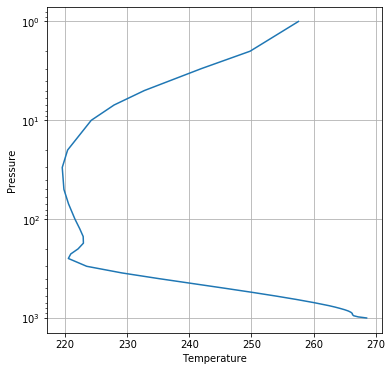

In [33]:
t_mean = np.mean(ts, axis = 0)
plt.figure(figsize = (6,6))
plt.plot(t_mean, ds['level'].values)
plt.gca().invert_yaxis()
plt.gca().set_yscale('log')
plt.grid()
plt.xlabel("Temperature")
plt.ylabel("Pressure")

In [139]:
level_meshx.shape

(37, 37)

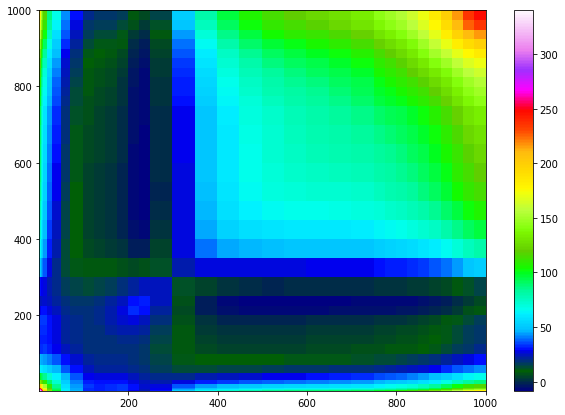

In [40]:
# plt.imshow(cov_mat)

plt.figure(figsize = (10,7))

level_meshx, level_meshy = np.meshgrid(profile_timeseries['level'].values, 
                                       profile_timeseries['level'].values)


plt.pcolor(level_meshx,
           level_meshy,
           cov_mat,
           cmap = plt.get_cmap('gist_ncar'))

plt.colorbar()